Gaussian Naive Bayes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [4]:
students = pd.read_csv("student_lifestyle_dataset.csv")

stress_mapping = {"Low": 0, "Moderate": 1, "High": 2}
students["Stress_Score"] = students["Stress_Level"].map(stress_mapping)
numeric_columns = students.select_dtypes(include=['number'])
if 'Student_ID' in numeric_columns.columns:
    numeric_columns = numeric_columns.drop(columns=['Student_ID'])
    

**Check the head of the dataframe.**

In [6]:
print(students.head())


   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  Stress_Score  
0  2.99     Moderate             1  
1  2.75          Low    

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

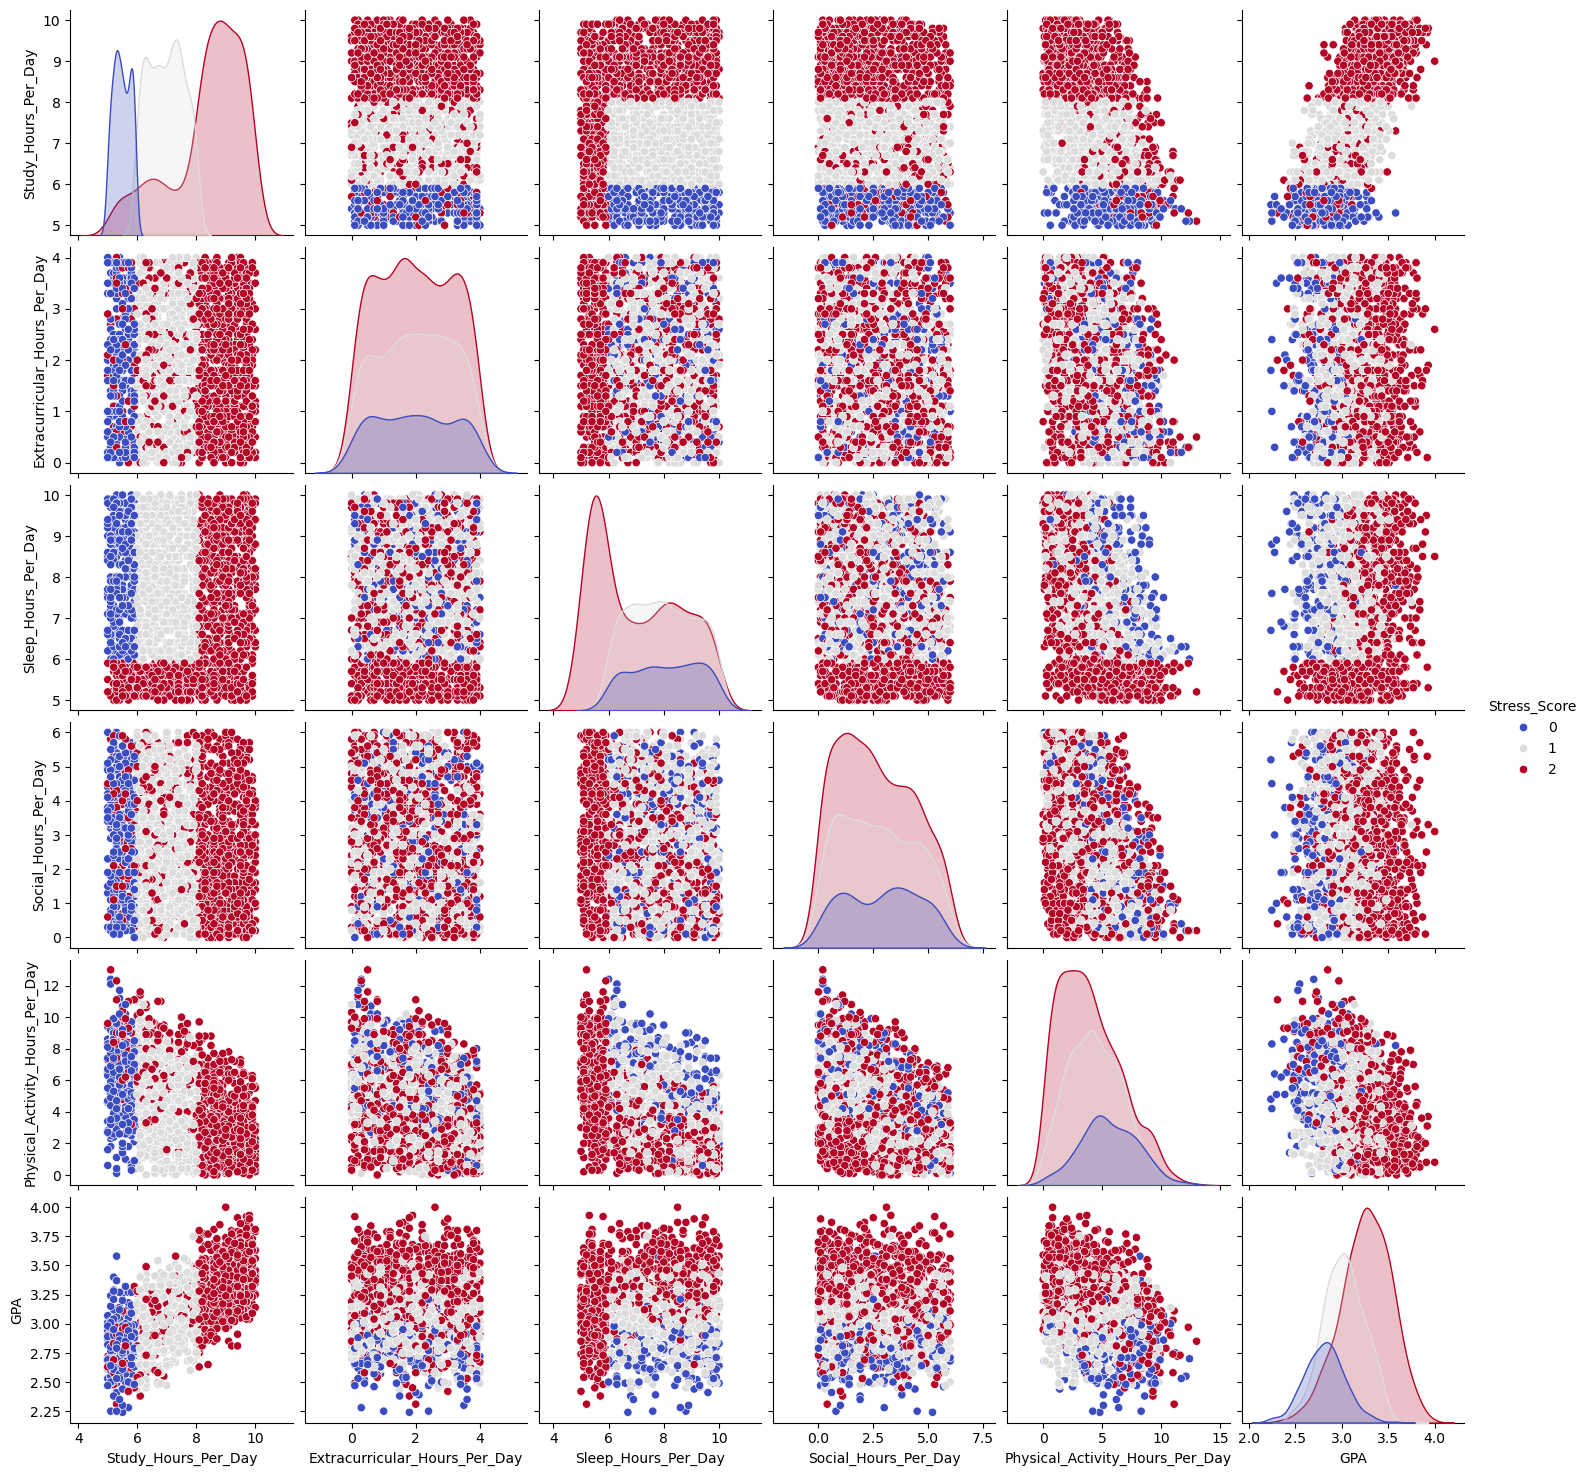

In [10]:
g = sns.pairplot(numeric_columns, hue = 'Stress_Score', palette='coolwarm')
plt.show()


# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [13]:
from sklearn.preprocessing import StandardScaler


** Create a StandardScaler() object called scaler.**

In [15]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [17]:
scaler.fit(numeric_columns.drop('Stress_Score',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [23]:
scaled_features = scaler.transform(numeric_columns.drop('Stress_Score',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [26]:
df_feat = pd.DataFrame(scaled_features,columns=numeric_columns.columns[:-1])
df_feat.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,-0.404487,1.566246,0.820734,0.056543,-1.005896,-0.421837
1,-1.528451,1.306633,0.341473,0.885882,-0.528470,-1.225591
2,-1.668947,1.652784,1.163063,-0.891273,0.108097,-1.493509
3,-0.685478,0.095105,-0.206253,-0.595080,0.864021,-0.790224
4,0.438487,-1.202961,-0.685514,-0.298888,0.903806,1.319630


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,numeric_columns['Stress_Score'],test_size=0.30)

In [34]:
from sklearn.naive_bayes import GaussianNB


In [36]:
help(GaussianNB)


Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |
 |  Gaussian Naive Bayes (GaussianNB).
 |
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,), default=None
 |      Prior probabilities of the classes. If specified, the priors are not
 |      adjusted according to the data.
 |
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |
 |      .. versionadded:: 0.20
 |
 |  Attributes
 |  ----------
 |  c

In [ ]:
**Create a KNN model instance with n_neighbors=1**

In [38]:
nb = GaussianNB(var_smoothing=1e-9)


In [41]:
nb.fit(X_train,y_train)


GaussianNB()

# Predictions and Evaluations
Let's evaluate our KNN model!

In [45]:
pred = nb.predict(X_test)


** Create a confusion matrix and classification report.**

In [48]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


In [50]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))


[[ 98   3   0]
 [  3 157  30]
 [ 25  35 249]]
0.84


In [52]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.78      0.97      0.86       101
           1       0.81      0.83      0.82       190
           2       0.89      0.81      0.85       309

    accuracy                           0.84       600
   macro avg       0.83      0.87      0.84       600
weighted avg       0.85      0.84      0.84       600



In [55]:
error_rate = []

for i in range(1,10):
    
    nb = GaussianNB(var_smoothing=10**(-i))
    nb.fit(X_train,y_train)
    pred_i = nb.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

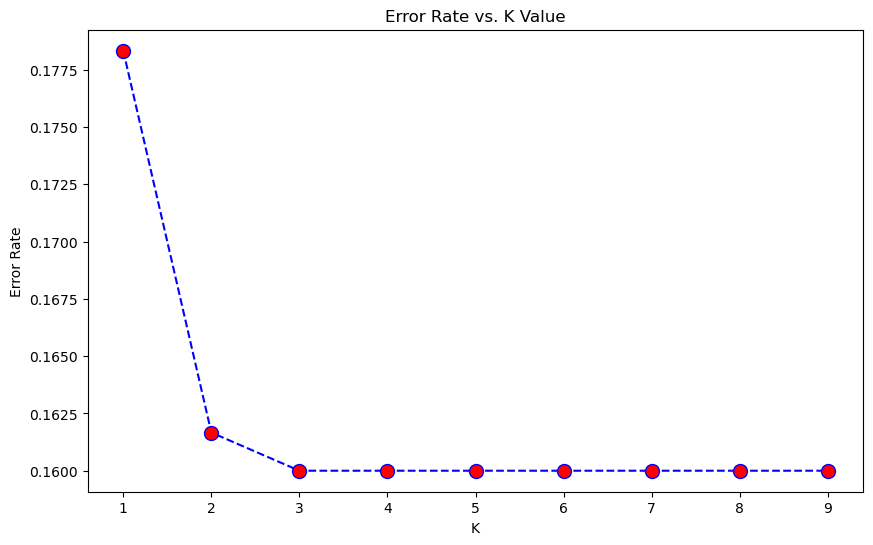

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [61]:

nb = GaussianNB(var_smoothing=1e-10)

nb.fit(X_train,y_train)
pred = nb.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
import numpy as np
print(np.unique(y_train))




[[ 98   3   0]
 [  3 157  30]
 [ 25  35 249]]


0.84


              precision    recall  f1-score   support

           0       0.78      0.97      0.86       101
           1       0.81      0.83      0.82       190
           2       0.89      0.81      0.85       309

    accuracy                           0.84       600
   macro avg       0.83      0.87      0.84       600
weighted avg       0.85      0.84      0.84       600

[0 1 2]
